In [2]:
!pip3 install pandas

In [3]:
import pandas as pd

In [4]:
pd.read_csv('alucar.csv').head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [5]:
df_alucar = pd.read_csv('alucar.csv')
df_alucar

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63
5,2017-06-30,81
6,2017-07-31,101
7,2017-08-31,124
8,2017-09-30,148
9,2017-10-31,174


In [6]:
df_alucar.dtypes

mes       object
vendas     int64
dtype: object

In [7]:
df_alucar['mes'] = pd.to_datetime(df_alucar['mes'])
df_alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [8]:
!pip3 install seaborn

In [9]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

print(sns.__version__)

0.13.2


<Axes: xlabel='mes', ylabel='vendas'>

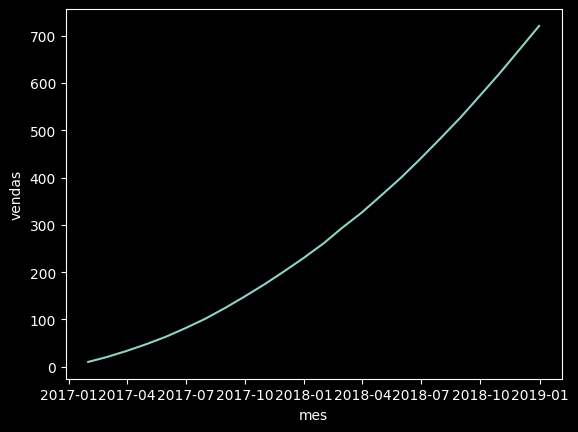

In [10]:
sns.lineplot(x='mes', y='vendas', data=df_alucar)

Text(0, 0.5, 'Vendas (R$)')

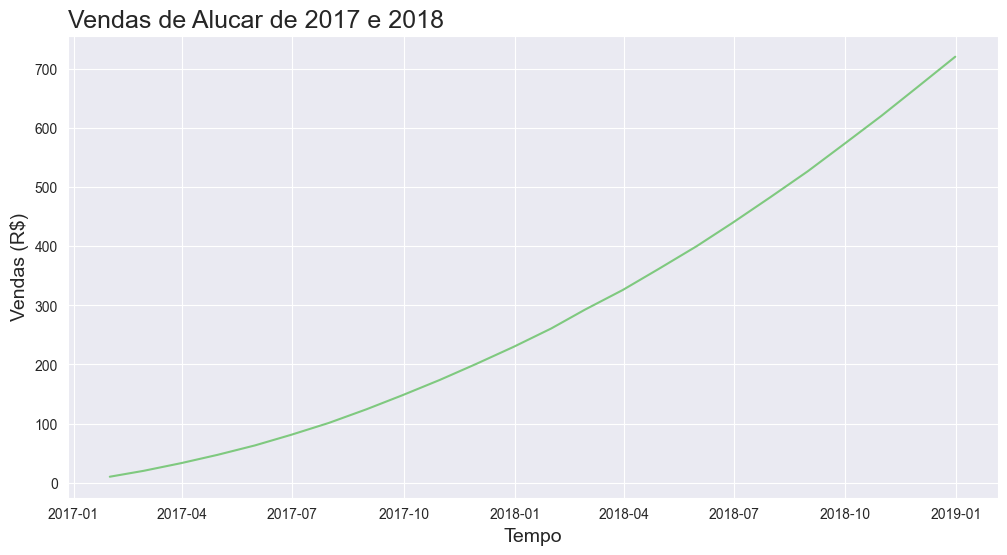

In [11]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=df_alucar)
ax.figure.set_size_inches(12, 6)
ax.set_title('Vendas de Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)

In [12]:
df_alucar['aumento'] = df_alucar['vendas'].diff()
df_alucar

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0
5,2017-06-30,81,18.0
6,2017-07-31,101,20.0
7,2017-08-31,124,23.0
8,2017-09-30,148,24.0
9,2017-10-31,174,26.0


Text(0, 0.5, 'Aumento')

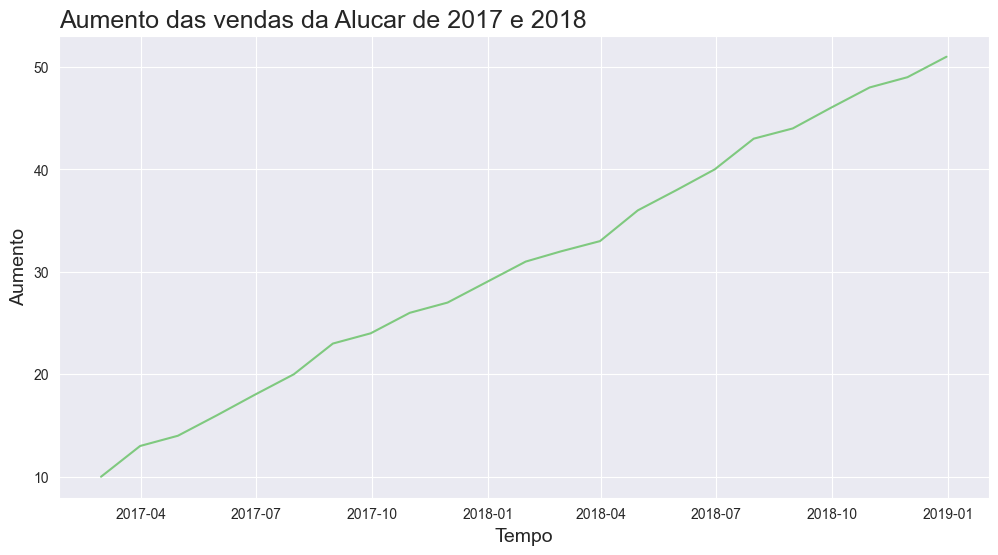

In [13]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data=df_alucar)
ax.figure.set_size_inches(12, 6)
ax.set_title('Aumento das vendas da Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14)

In [14]:
def plotar(titulo, labelx, labely, x, y, df):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=df)
    ax.figure.set_size_inches(12, 6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)

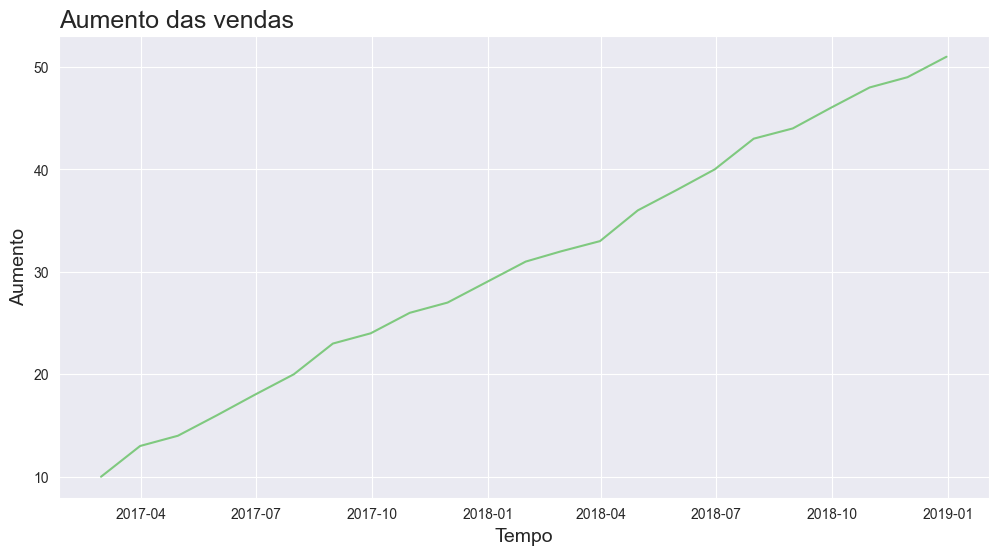

In [15]:
plotar('Aumento das vendas', 'Tempo', 'Aumento', 'mes', 'aumento', df_alucar)

In [16]:
df_alucar['aceleracao'] = df_alucar['aumento'].diff()
df_alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


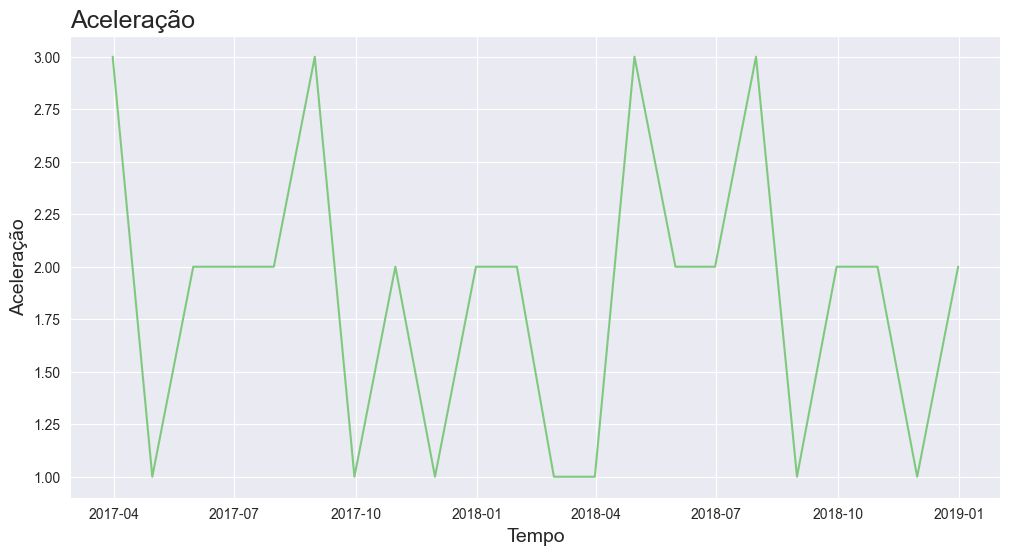

In [17]:
plotar('Aceleração', 'Tempo', 'Aceleração', 'mes', 'aceleracao', df_alucar)

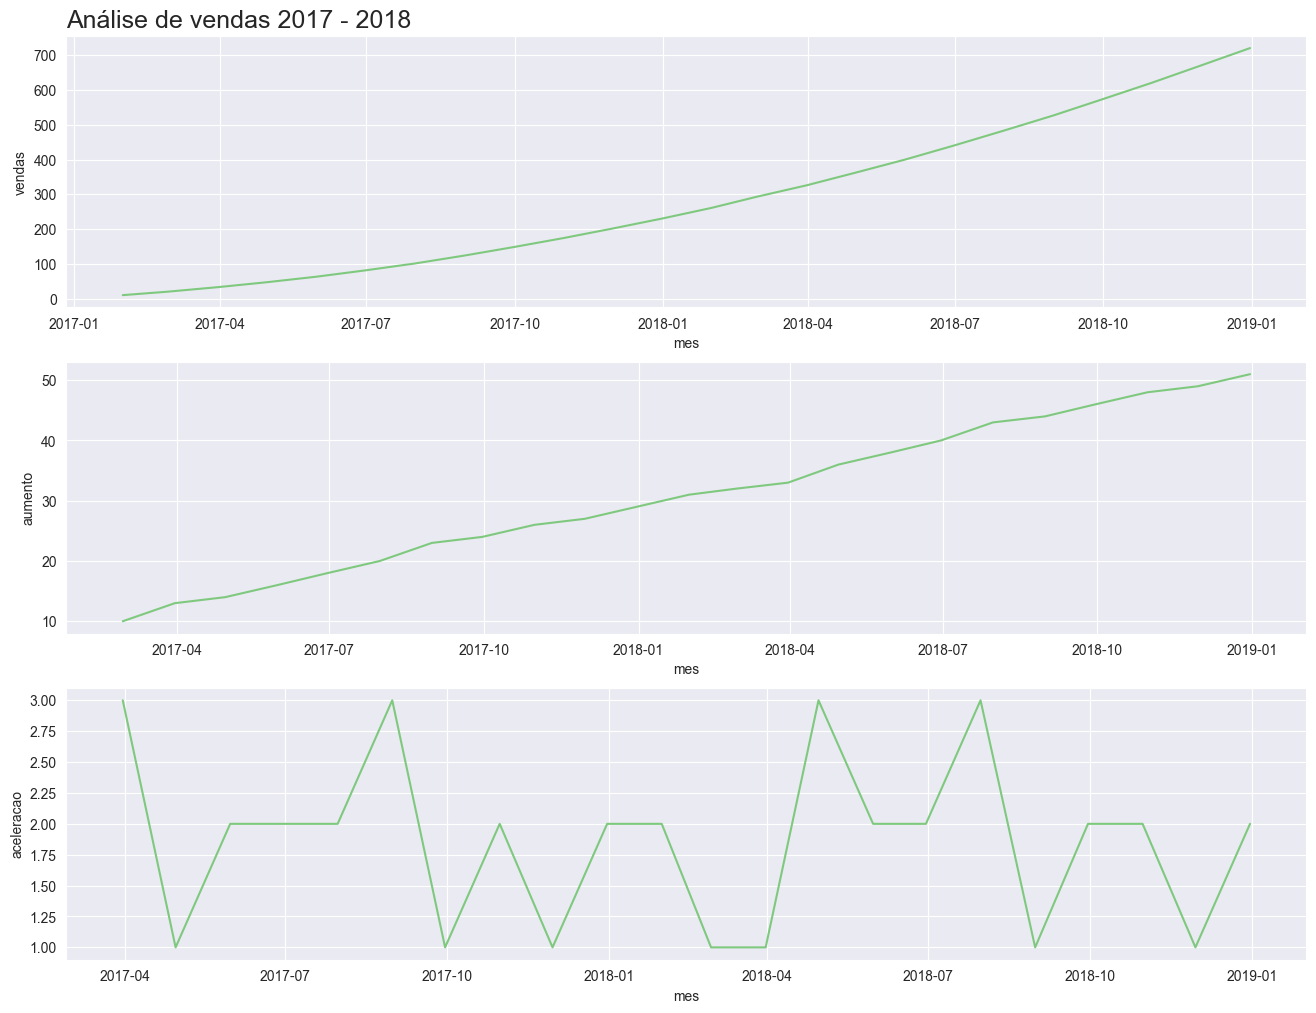

In [19]:
plt.figure(figsize=(16, 12))
ax = plt.subplot(3, 1, 1)
ax.set_title('Análise de vendas 2017 - 2018', fontsize=18, loc='left')
ax = sns.lineplot(x='mes', y='vendas', data=df_alucar)
plt.subplot(3, 1, 2)
ax = sns.lineplot(x='mes', y='aumento', data=df_alucar)
plt.subplot(3, 1, 3)
ax = sns.lineplot(x='mes', y='aceleracao', data=df_alucar)

In [20]:
def plot_comparacao(x, y1, y2, y3, df, title):
    plt.figure(figsize=(16, 12))
    ax = plt.subplot(3, 1, 1)
    ax.set_title(title, fontsize=18, loc='left')
    ax = sns.lineplot(x=x, y=y1, data=df)
    plt.subplot(3, 1, 2)
    ax = sns.lineplot(x=x, y=y2, data=df)
    plt.subplot(3, 1, 3)
    ax = sns.lineplot(x=x, y=y3, data=df)

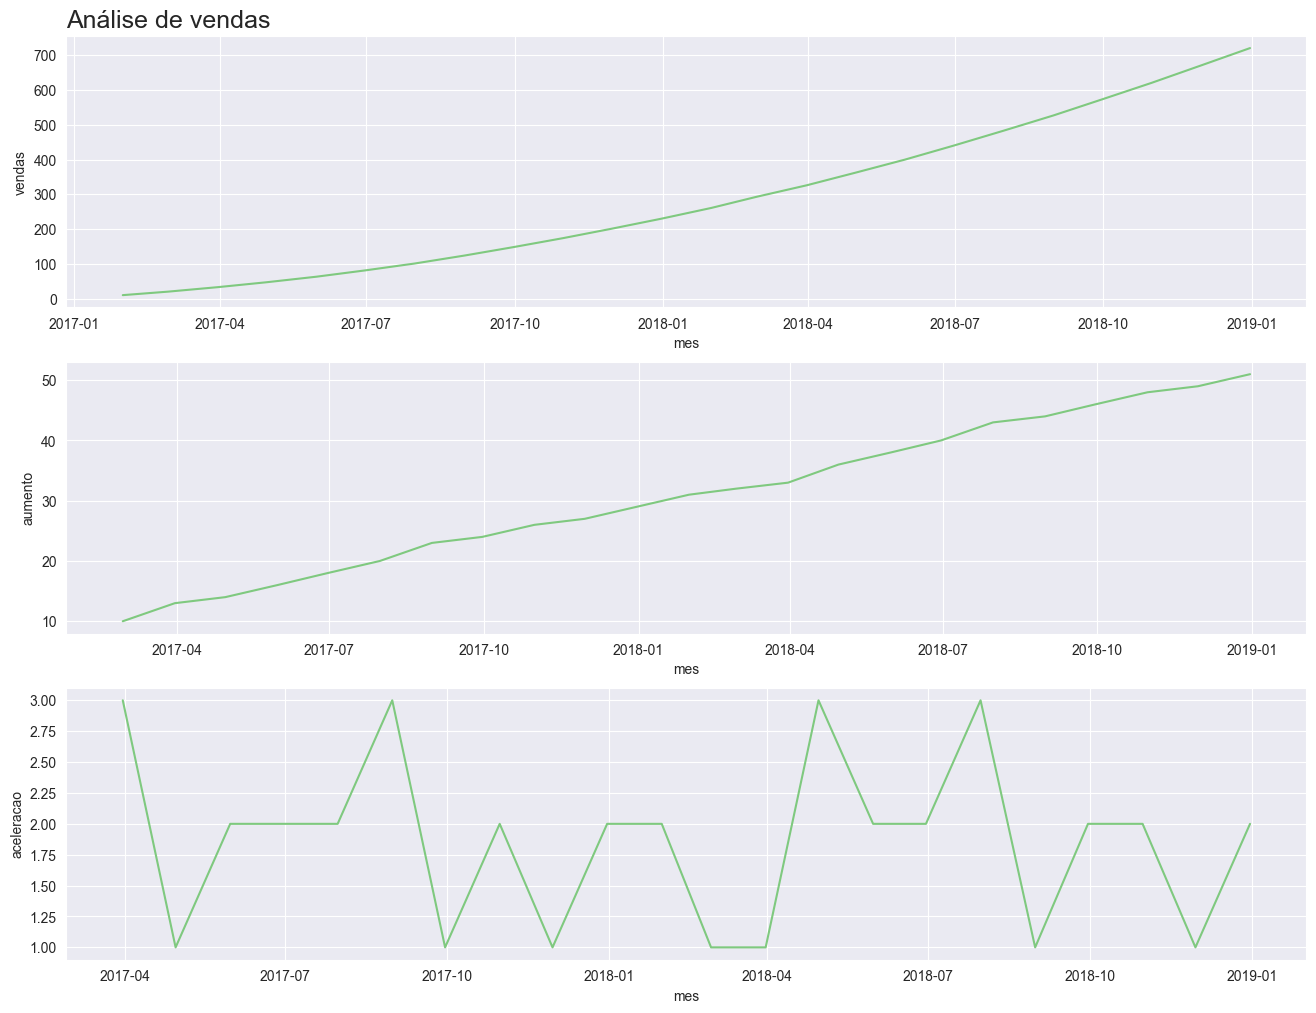

In [21]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', df_alucar, 'Análise de vendas')

In [22]:
from pandas.plotting import autocorrelation_plot

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

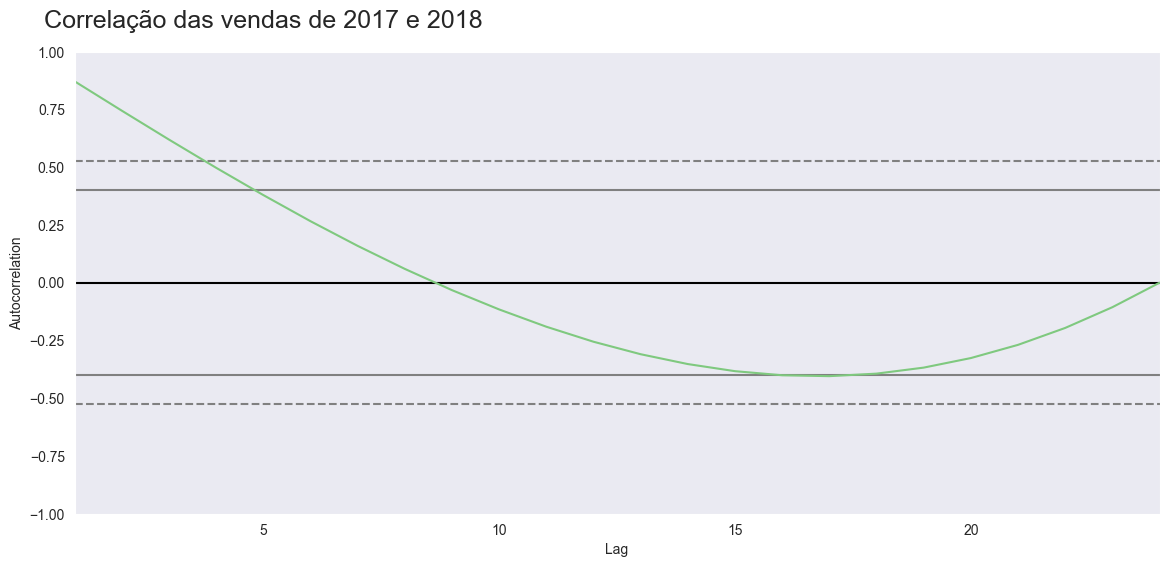

In [27]:
ax = plt.figure(figsize=(14,6))
ax.suptitle('Correlação das vendas de 2017 e 2018', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(df_alucar['vendas'])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

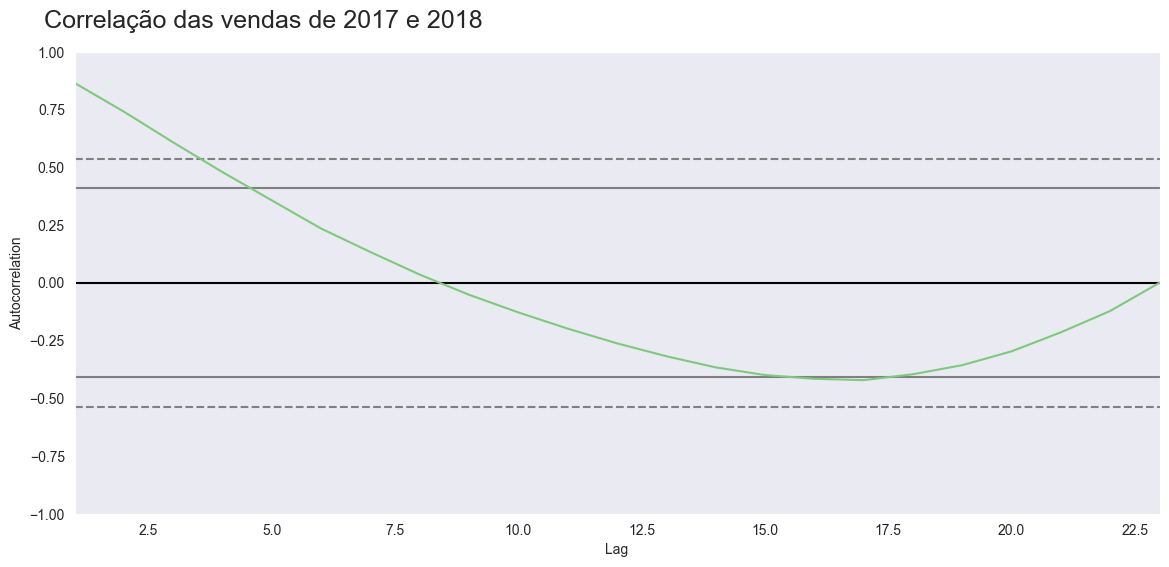

In [30]:
ax = plt.figure(figsize=(14,6))
ax.suptitle('Correlação das vendas de 2017 e 2018', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(df_alucar['aumento'][1:])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

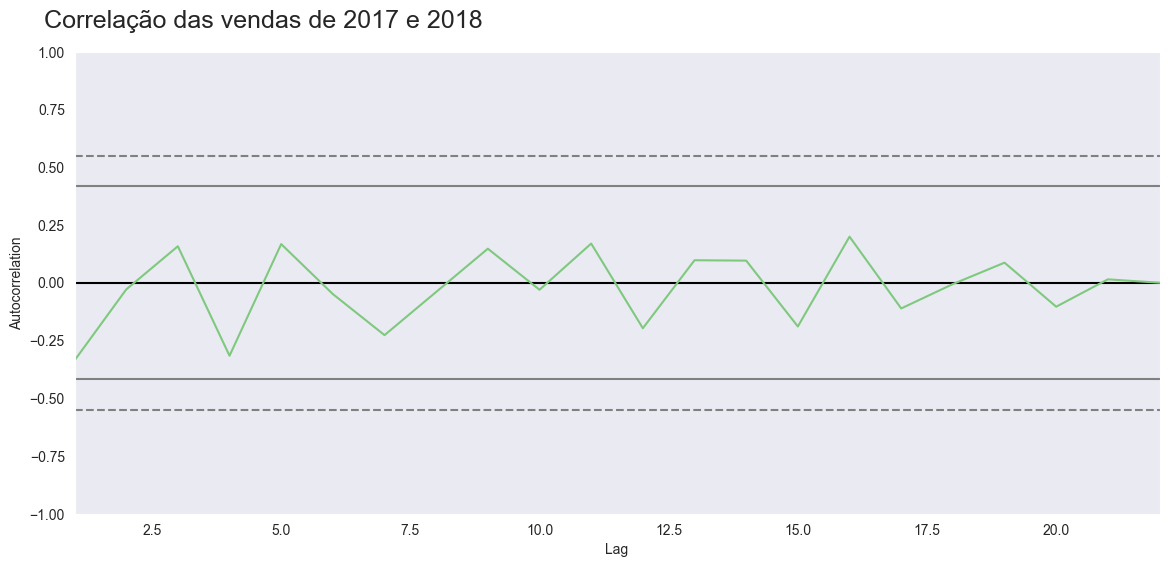

In [32]:
ax = plt.figure(figsize=(14,6))
ax.suptitle('Correlação das vendas de 2017 e 2018', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(df_alucar['aceleracao'][2:])

In [33]:
df_assinantes = pd.read_csv('newsletter_alucar.csv')
df_assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [35]:
df_assinantes['mes'] = pd.to_datetime(df_assinantes['mes'])

In [36]:
df_assinantes['aumento'] = df_assinantes['assinantes'].diff()
df_assinantes['aceleracao'] = df_assinantes['aumento'].diff()

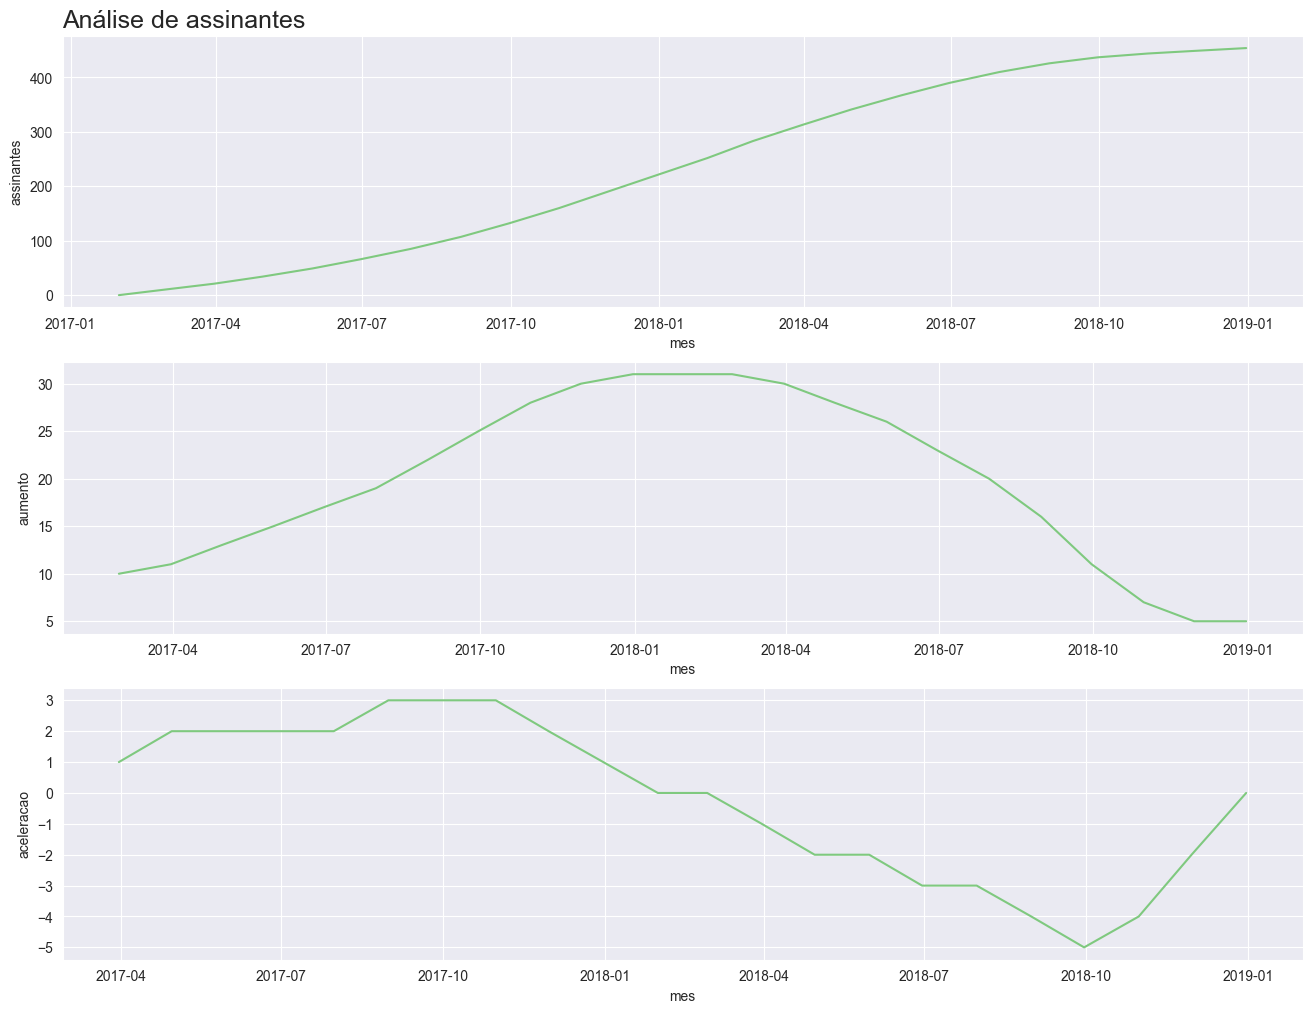

In [38]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', df_assinantes, 'Análise de assinantes')

In [39]:
df_chocolura = pd.read_csv('chocolura.csv')
df_chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [40]:
df_chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [41]:
df_chocolura['mes'] = pd.to_datetime(df_chocolura['mes'])

In [42]:
df_chocolura['aumento'] = df_chocolura['vendas'].diff()
df_chocolura['aceleracao'] = df_chocolura['aumento'].diff()

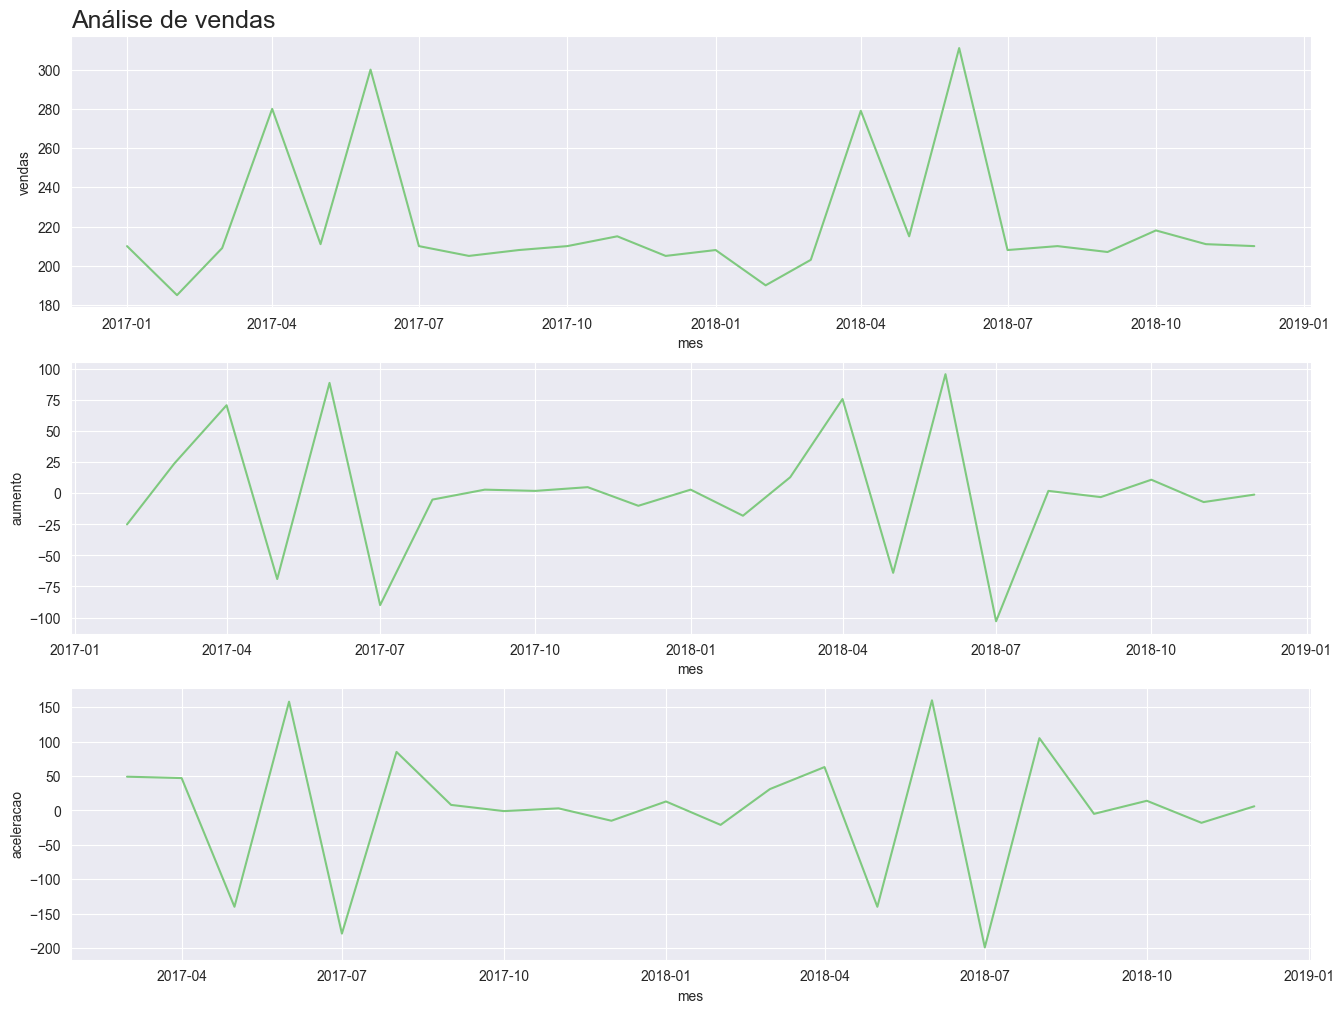

In [43]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', df_chocolura, 'Análise de vendas')

In [44]:
df_vendas_por_dia = pd.read_csv('vendas_por_dia.csv')
df_vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [45]:
df_vendas_por_dia['dia'] = pd.to_datetime(df_vendas_por_dia['dia'])

In [46]:
df_vendas_por_dia['aumento'] = df_vendas_por_dia['vendas'].diff()
df_vendas_por_dia['aceleracao'] = df_vendas_por_dia['aumento'].diff()

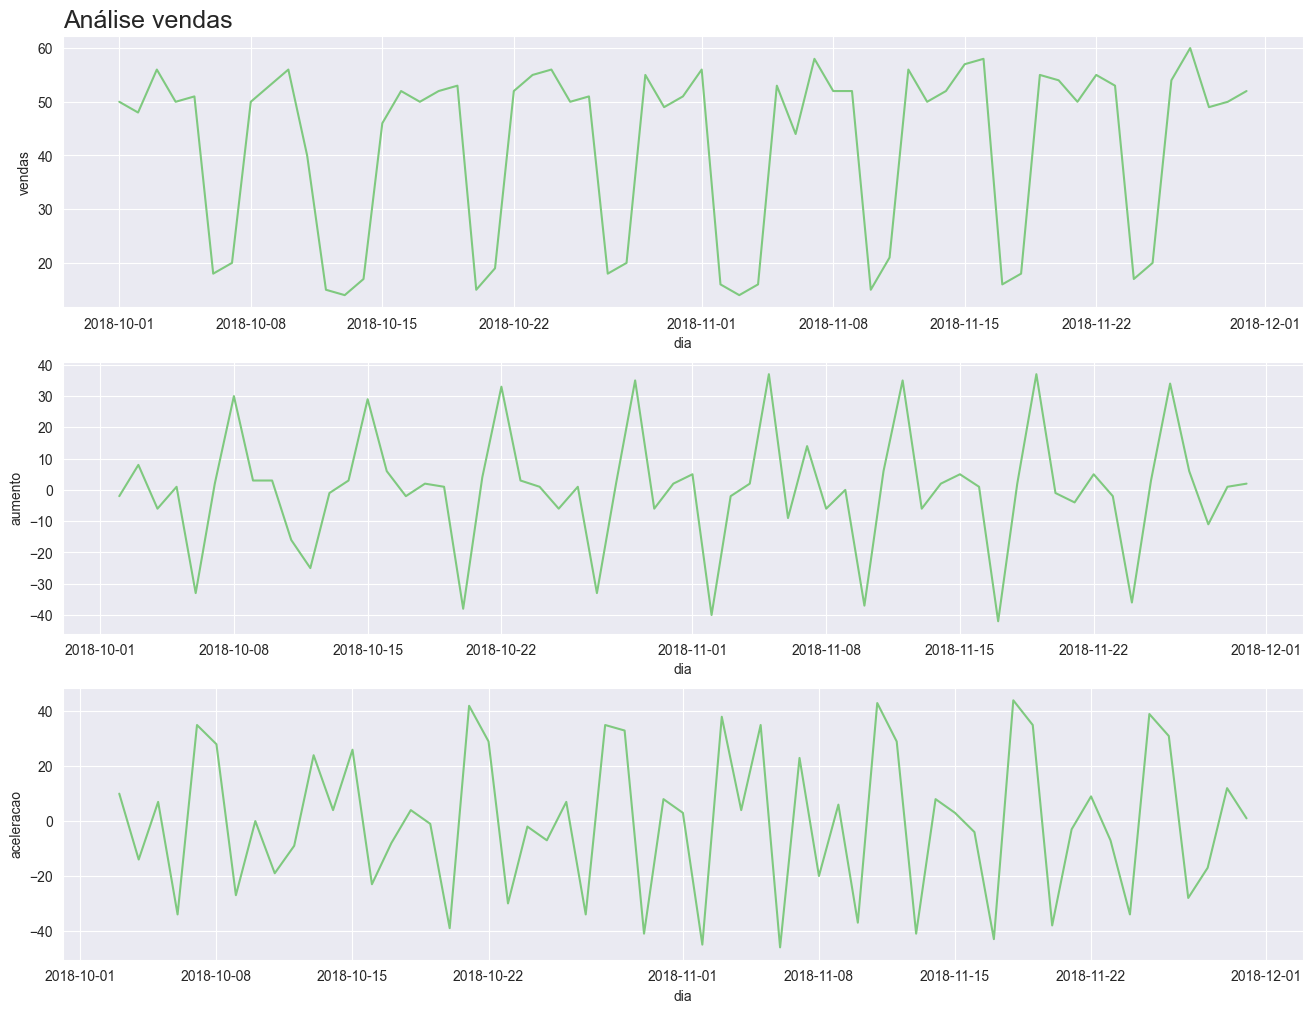

In [47]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', df_vendas_por_dia, 'Análise vendas')

In [57]:
df_vendas_por_dia['dia_da_semana'] = df_vendas_por_dia['dia'].dt.day_name('pt')

df_vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda-feira
1,2018-10-02,48,-2.0,NaN,Terça-feira
2,2018-10-03,56,8.0,10.0,Quarta-feira
3,2018-10-04,50,-6.0,-14.0,Quinta-feira
4,2018-10-05,51,1.0,7.0,Sexta-feira


In [67]:
df_analise_vendas_por_dia = df_vendas_por_dia.groupby(by=['dia_da_semana'])[['vendas', 'aumento', 'aceleracao']].mean().round()
df_analise_vendas_por_dia

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta-feira,53.0,1.0,2.0
Quinta-feira,51.0,-2.0,-3.0
Segunda-feira,52.0,34.0,31.0
Sexta-feira,45.0,-7.0,-5.0
Sábado,16.0,-28.0,-20.0
Terça-feira,52.0,-1.0,-34.0


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

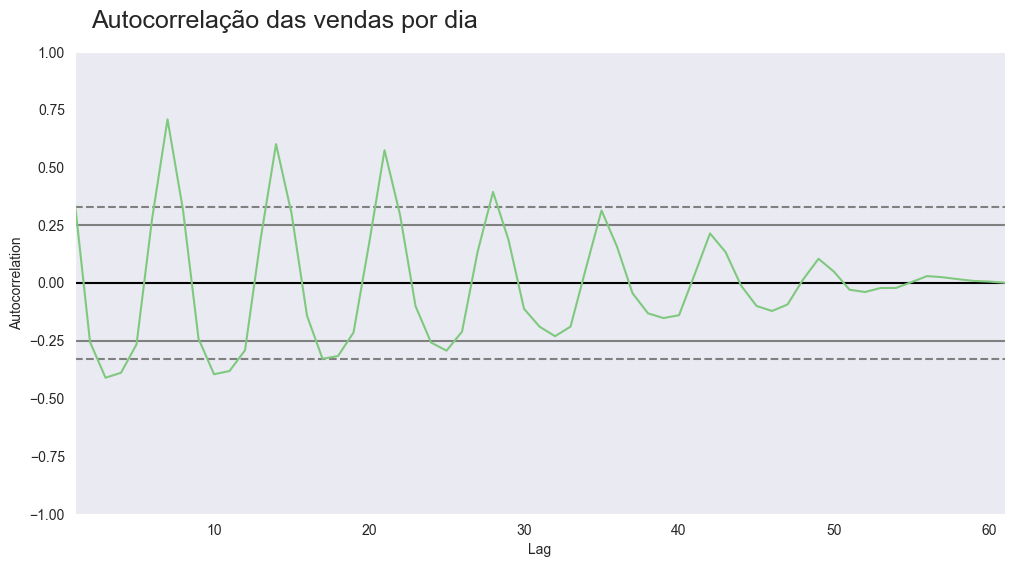

In [71]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Autocorrelação das vendas por dia', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(df_vendas_por_dia['vendas'])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

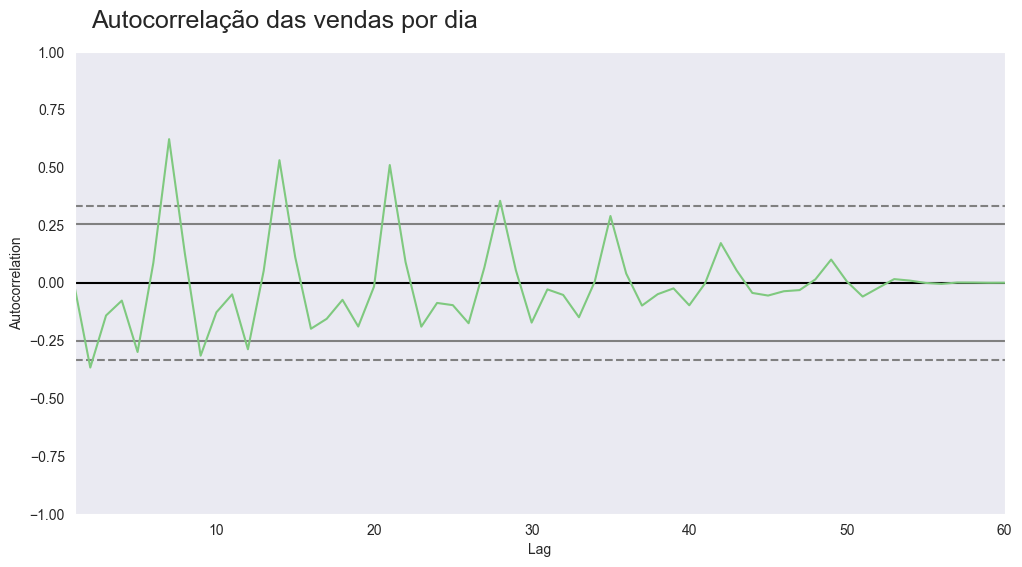

In [72]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Autocorrelação das vendas por dia', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(df_vendas_por_dia['aumento'][1:])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

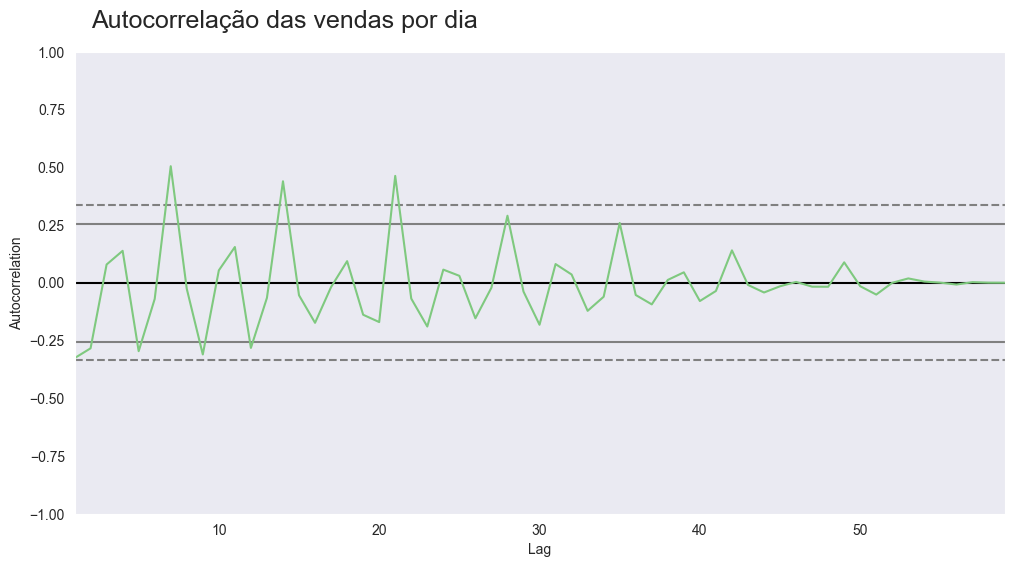

In [74]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Autocorrelação das vendas por dia', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(df_vendas_por_dia['aceleracao'][2:])

In [76]:
df_cafelura = pd.read_csv('cafelura.csv')
df_cafelura['mes'] = pd.to_datetime(df_cafelura['mes'])
df_cafelura['aumento'] = df_cafelura['vendas'].diff()
df_cafelura['aceleracao'] = df_cafelura['aumento'].diff()

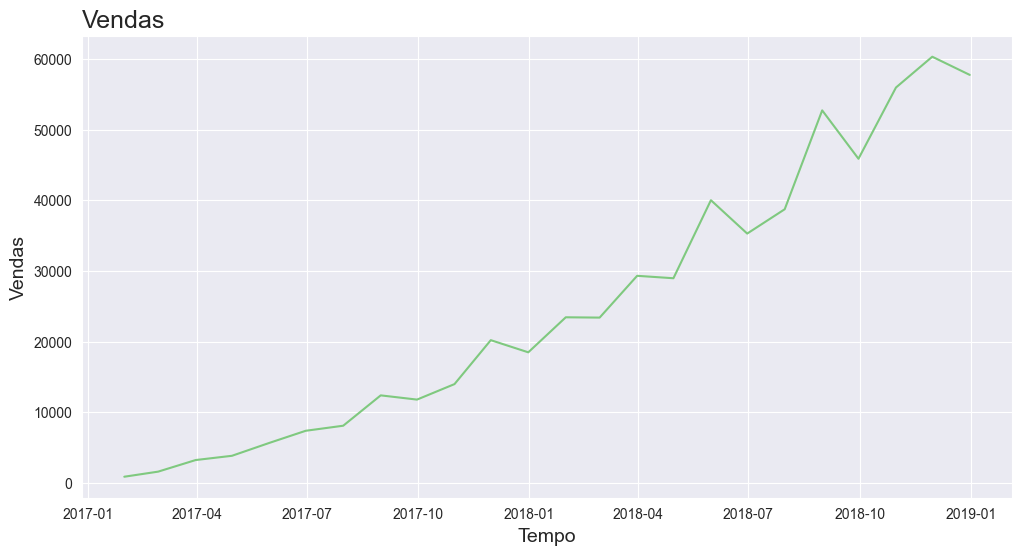

In [79]:
plotar('Vendas', 'Tempo', 'Vendas', 'mes', 'vendas', df_cafelura)

In [86]:
df_dias_fds = pd.read_csv('dias_final_de_semana.csv')
df_dias_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [82]:
df_dias_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8], dtype=int64)

In [84]:
df_cafelura['vendas_normalizadas'] = df_cafelura['vendas'] / df_dias_fds['quantidade_de_dias'].values
df_cafelura.head()

,mes,vendas,aumento,aceleracao,vendas_normalizadas
0,2017-01-31,880,NaN,NaN,110.0
1,2017-02-28,1600,720.0,NaN,200.0
2,2017-03-31,3240,1640.0,920.0,324.0
3,2017-04-30,3840,600.0,-1040.0,480.0
4,2017-05-31,5670,1830.0,1230.0,630.0


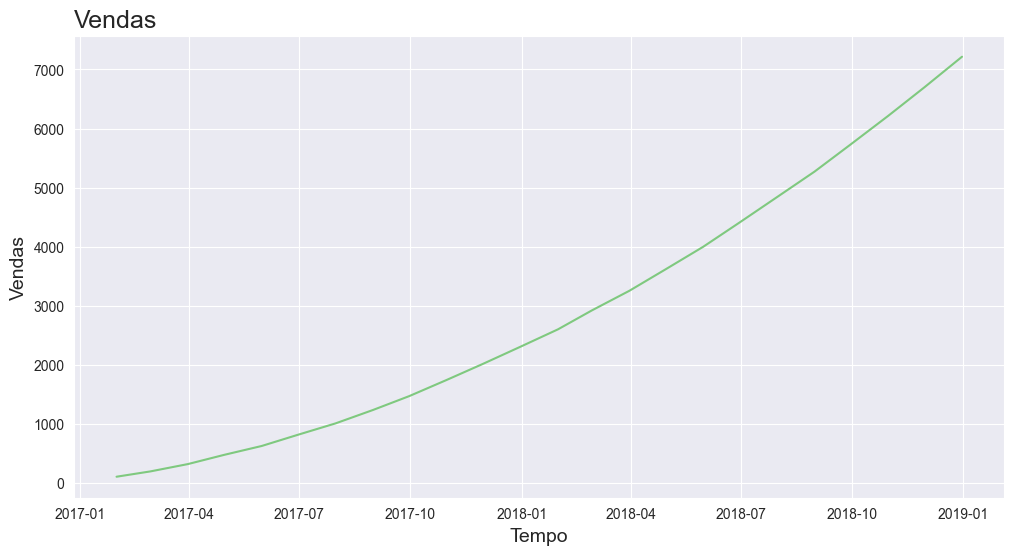

In [87]:
plotar('Vendas', 'Tempo', 'Vendas', 'mes', 'vendas_normalizadas', df_cafelura)

In [93]:
from statsmodels.tsa.seasonal import seasonal_decompose

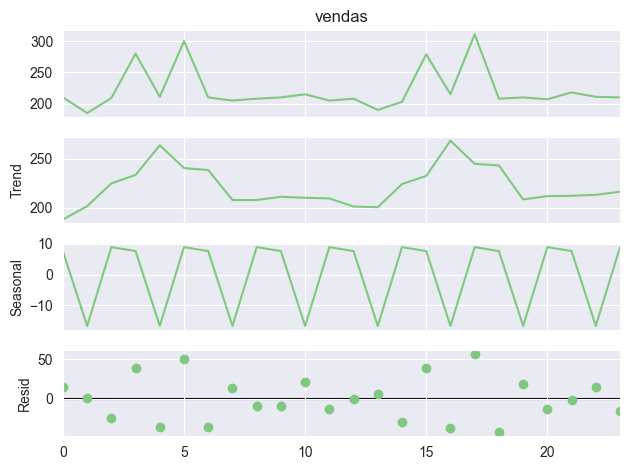

In [106]:
df_resultados = seasonal_decompose(df_chocolura['vendas'], extrapolate_trend='freq', period=3)
ax = df_resultados.plot()

In [107]:
df_observacao = df_resultados.observed
df_tendencia = df_resultados.trend
df_sazonalidade = df_resultados.seasonal
df_residuo = df_resultados.resid

In [108]:
data = ({
    'observacao': df_observacao,
    'tendencia': df_tendencia,
    'sazonalidade': df_sazonalidade,
    'ruido': df_residuo
})

df_resultados = pd.DataFrame(data)
df_resultados.head()

,observacao,tendencia,sazonalidade,ruido
0,210.0,187.777778,7.692130,14.530093
1,185.0,201.333333,-16.668981,0.335648
2,209.0,224.666667,8.976852,-24.643519
3,280.0,233.333333,7.692130,38.974537
4,211.0,263.666667,-16.668981,-35.997685


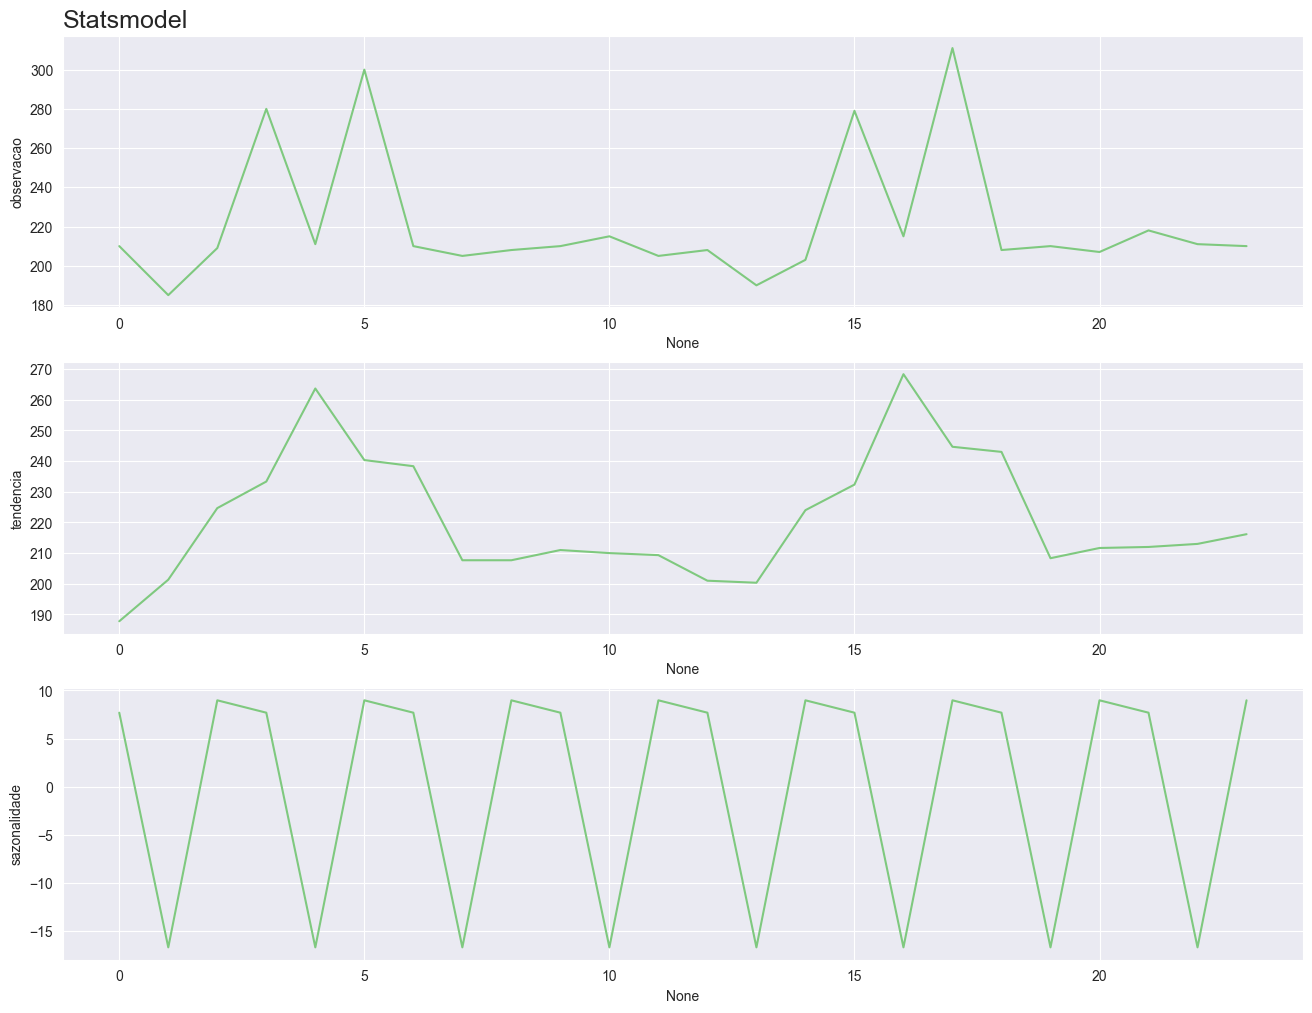

In [111]:
plot_comparacao(df_resultados.index, 'observacao', 'tendencia', 'sazonalidade', df_resultados, 'Statsmodel')

In [114]:
df_alucel = pd.read_csv('alucel.csv')
df_alucel['dia'] = pd.to_datetime(df_alucel['dia'])

In [115]:
df_alucel['aumento'] = df_alucel['vendas'].diff()
df_alucel['aceleracao'] = df_alucel['aumento'].diff()

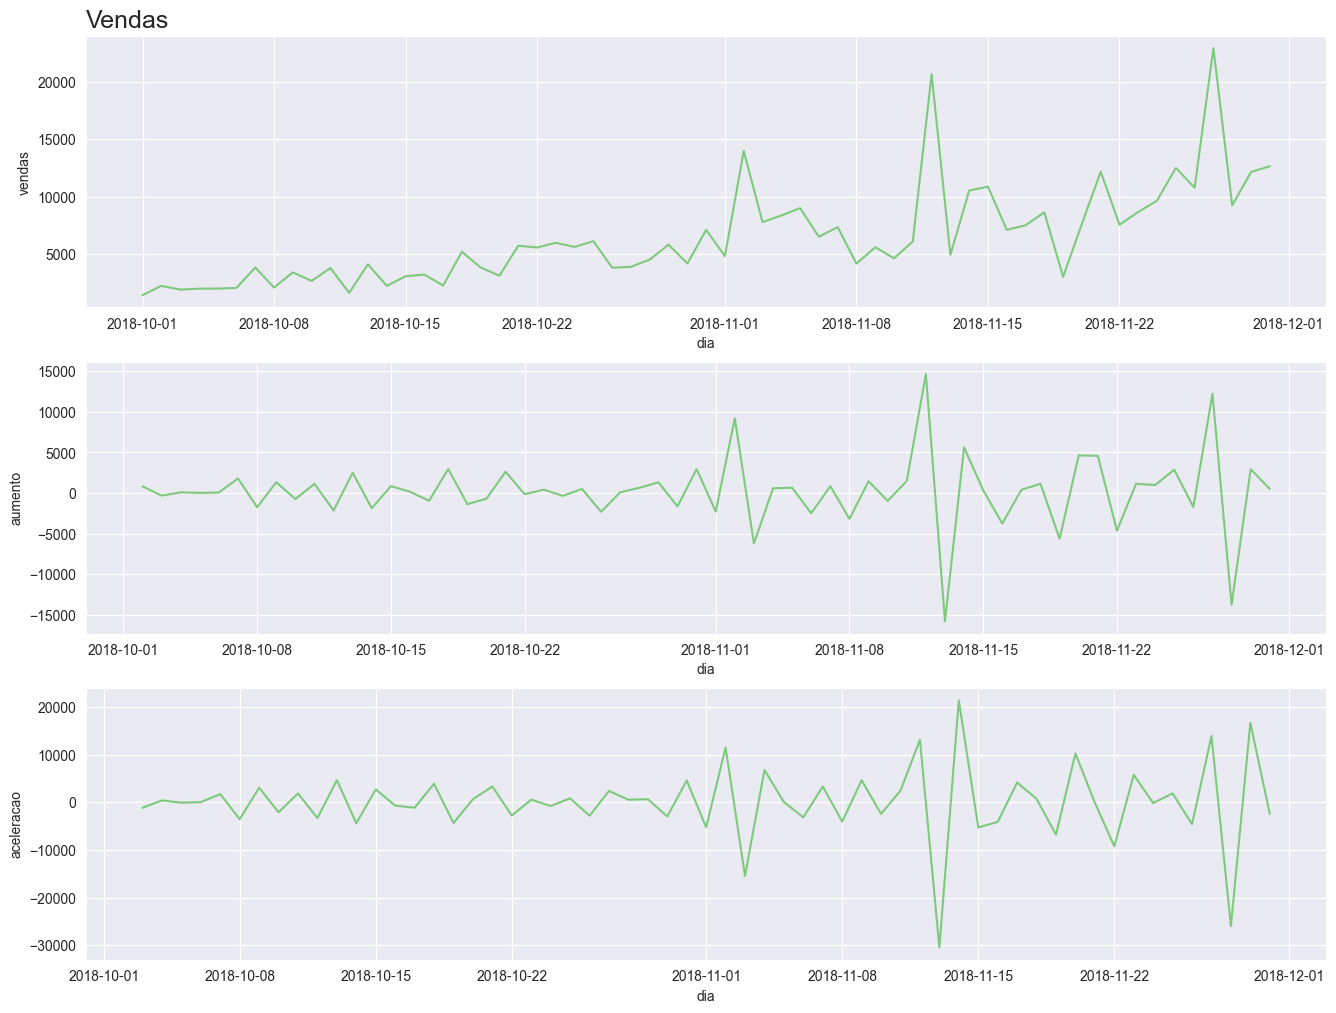

In [116]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', df_alucel, 'Vendas')

In [119]:
df_alucel['media_movel'] = df_alucel['vendas'].rolling(window=7).mean()
df_alucel.head(20)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429
7,2018-10-08,2039.59,-1753.48,-3540.66,2252.827143
8,2018-10-09,3365.58,1325.99,3079.47,2421.382857
9,2018-10-10,2616.12,-749.46,-2075.45,2529.348571


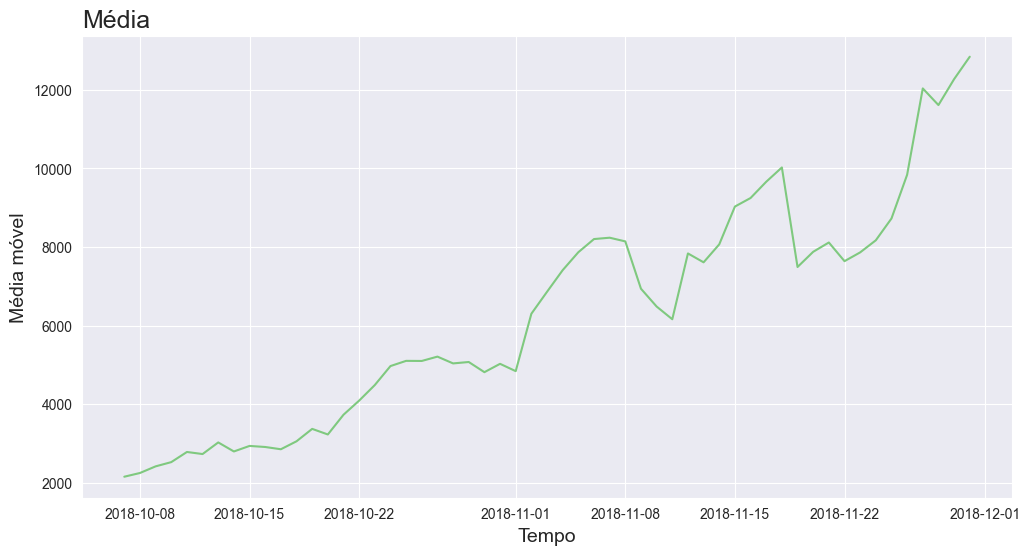

In [121]:
plotar('Média', 'Tempo', 'Média móvel', 'dia', 'media_movel', df_alucel)

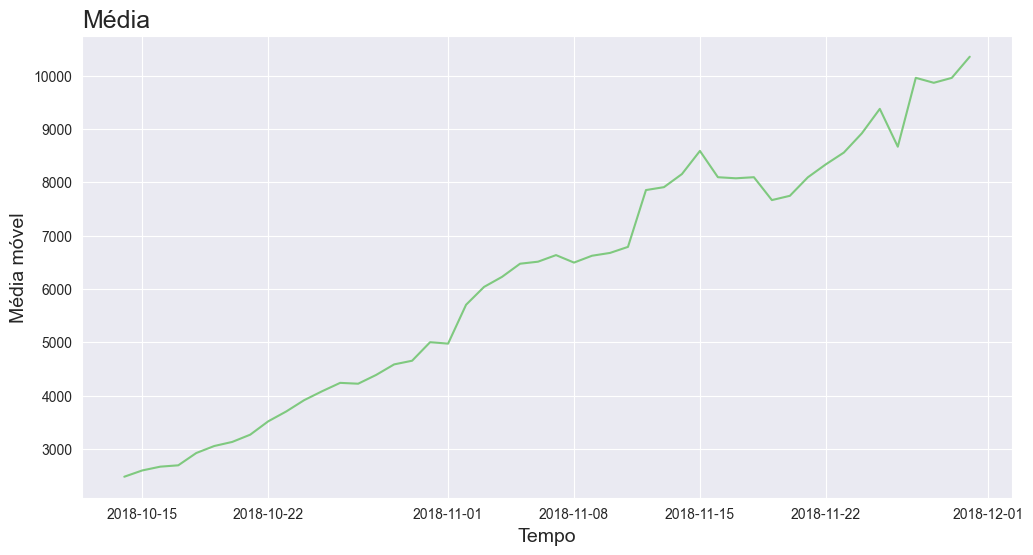

In [124]:
df_alucel['media_movel_14'] = df_alucel['vendas'].rolling(14).mean()
plotar('Média', 'Tempo', 'Média móvel', 'dia', 'media_movel_14', df_alucel)

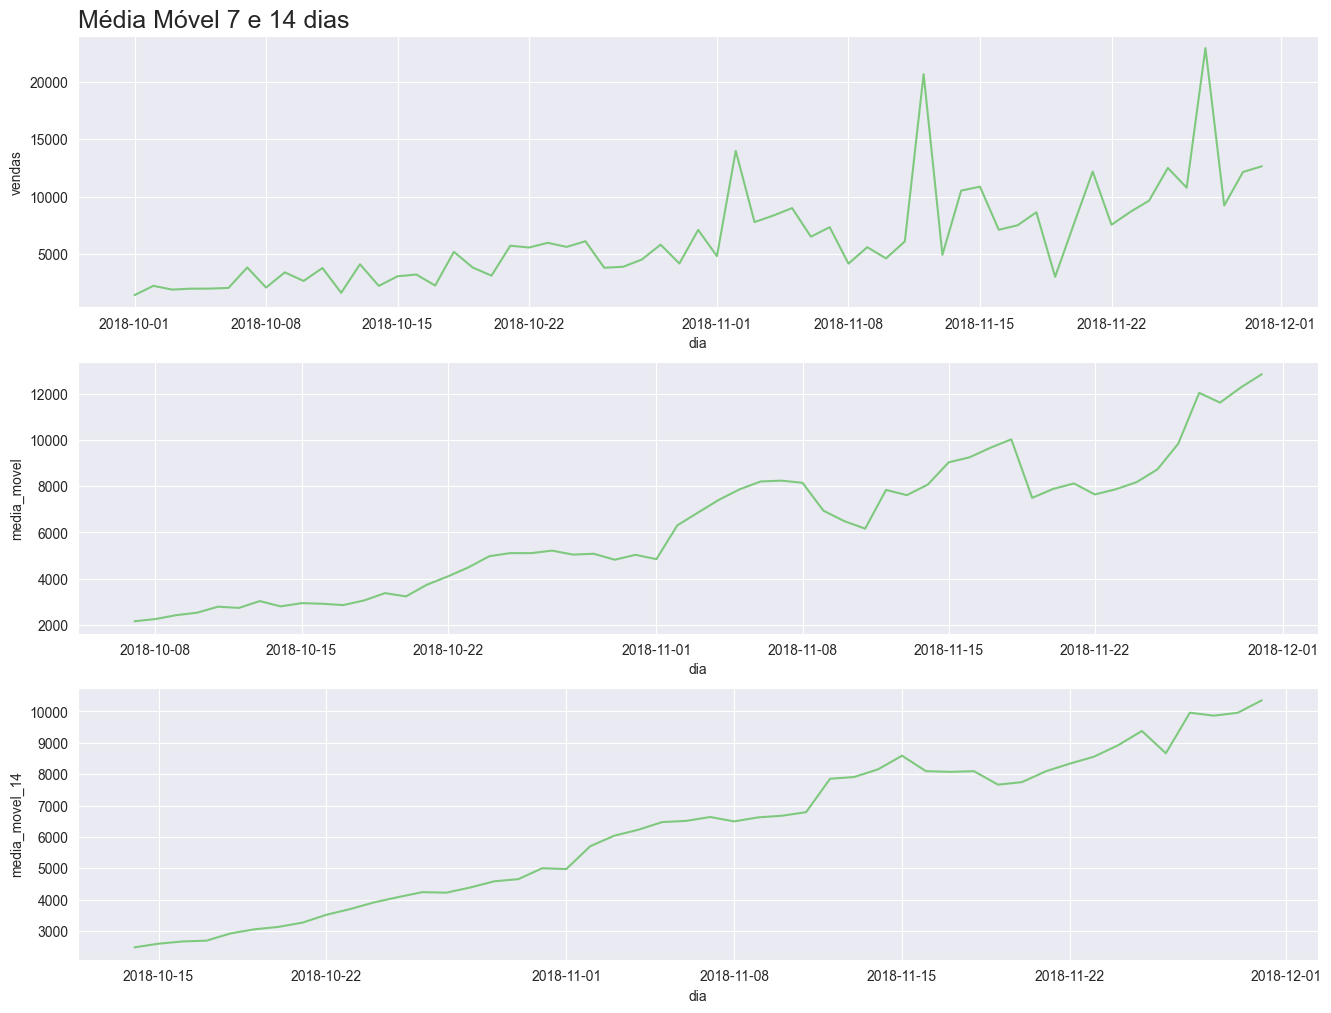

In [125]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel_14', df_alucel, 'Média Móvel 7 e 14 dias')